In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [2]:
a1 = np.array([1, 2, 1])
a2 = np.array([1, 3])

np.convolve(a1, a2)

array([1, 5, 7, 3])

# Discrete Convolutions

For a discrete 1D function:

$$
f[x] = [f_0, f_1, \dots, f_{N-1}] \\
g[x] = [g_0, g_1, \dots, g_{M-1}]
$$

The convolution of $ f $ and $ g $, denoted by $ (f * g)[n] $, is defined as:

$$
(f * g)[n] = \sum_{k=0}^{N-1} f[k] \cdot g[n - k]
$$


More precisely, for sequences of lengths $ N $ and $ M $, the convolution is given by:

$$
(f * g)[n] = \sum_{k=0}^{N-1} f[k] \cdot g[n - k], \quad \text{for } n = 0, 1, \dots, n + m - 2
$$

If an index is out of bounds for $ g $, the corresponding term is treated as zero (zero-padding).

This results in a new sequence of length $ N + M - 1 $.

In [3]:
""" The convolution of 1D discrete functions f and g passed as np.array"""
def convolve(f: np.array, g: np.array) -> np.array:
    result = np.zeros(len(f) + len(g) - 1)
    for n in range(len(result)):
        for k in range(len(f)):
            if 0 <= n - k < len(g):
                result[n] += f[k] * g[n -k]
    return result

In [4]:
convolve(a1, a2)

array([1., 5., 7., 3.])

# Continuous 1D Convolutions

For continuous functions $ f(t) $ and $ g(t) $, the **convolution** of $ f $ and $ g $, denoted by $ (f * g)(t) $, is defined as:

$$
(f * g)(t) = \int_{-\infty}^{\infty} f(x) \cdot g(t - x) \, dx
$$

Alternatively, it can be written with variables switched:

$$
(f * g)(t) = \int_{-\infty}^{\infty} f(t - x) \cdot g(x) \, dx
$$

The result $ (f * g)(t) $ expresses how much $ g $ overlaps with a **time-shifted** version of $ f $, and is used extensively probability and statistics.


In [5]:
def f(x):
    return np.exp(-x**2)

def g(x):
    return np.exp(-x**2)

def g_tmx(t, x):
    return g(t - x)

In [6]:
x = np.linspace(-5, 5, 1000)

f_y = f(x)
g_y = g(x)

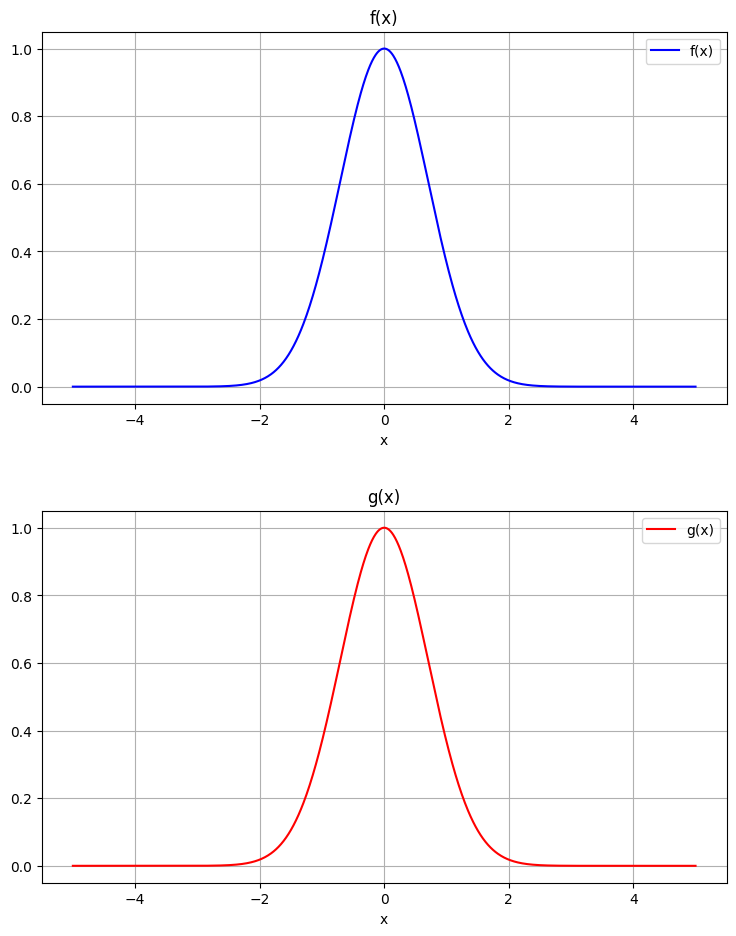

In [7]:
fig, axs = plt.subplots(2, 1, figsize=(8, 10), sharex=False)

axs[0].plot(x, f_y, label='f(x)', color='blue')
axs[0].set_title('f(x)')
axs[0].set_xlabel('x')  
axs[0].grid(True)
axs[0].legend()

axs[1].plot(x, g_y, label='g(x)', color='red')
axs[1].set_title('g(x)')
axs[1].set_xlabel('x')  
axs[1].grid(True)
axs[1].legend()

plt.tight_layout(pad=3.0)
plt.show()

In [8]:
def f_conv_g(t):
    integrand = lambda x: f(x) * g_tmx(t, x)
    result, _ = quad(integrand, -np.inf, np.inf)
    return result

inp = x
f_conv_g_y = np.array([f_conv_g(t_) for t_ in inp])

In [9]:
frames = list(np.linspace(-3, 3 + 1, 50))

fig, axs = plt.subplots(2, 2, figsize=(7, 7), sharex=False, sharey=False)
fig.delaxes(axs[1,1])

def update(t):    
    axs[0,0].clear()
    axs[0,1].clear()
    axs[1,0].clear()
    
    axs[0,0].plot(x, g_tmx(t, x), label='g(t - x)', linestyle='--', color='red')
    axs[0,0].set_title(f'g(t - x): t = {round(t, 2)}')
    axs[0,0].set_xlabel('x')  
    axs[0,0].grid(True)
    axs[0,0].legend()
    axs[0,1].set_ylim(0, 1.5)
    
    axs[0,1].plot(x, f(x) * g_tmx(t, x), label='f(x) · g(t - x)', color='green')
    axs[0,1].set_title('Multiplication result')
    axs[0,1].set_xlabel('x')  
    axs[0,1].grid(True)
    axs[0,1].legend()
    axs[0,1].set_ylim(0, 2)
    
    axs[1,0].plot(x, f_conv_g_y, label='∫ f(x) · g(t - x) dx', color='blue')
    axs[1,0].set_title('Convolution')
    axs[1,0].set_xlabel('t')  
    axs[1,0].grid(True)
    axs[1,0].legend()
    axs[1,0].set_ylim(0, 1.8)
    
    # Draw vertical line at current t
    axs[1,0].plot([t, t], [0, f_conv_g(t)], color='red', linestyle='--', linewidth=1)

    # Add point on the convolution curve at current t
    axs[1,0].plot(t, f_conv_g(t), 'ro') 
    axs[1,0].annotate(f'{f_conv_g(t):.2f}', xy=(t, f_conv_g(t)), xytext=(5, 5), textcoords='offset points', color='red')
    
    plt.tight_layout(pad=3.0)

plt.close()
ani = FuncAnimation(fig, update, frames=frames, repeat=False)
HTML(ani.to_jshtml())

<Figure size 640x480 with 0 Axes>